<a href="https://colab.research.google.com/github/lakshh670/100_days_of_DeepLearning/blob/main/Transfer_Learning_Feature_extraction(Without_Data_Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In this notebook we will see transfer learning. Transfer learning is a process in which we dont train our model from scratch for our dataset, instead we choose a pre-trained model and we train only the fully connected part(ANN) of the model.
# Transfer learning is of two types:
# 1. Feature Extraction: In this we train the ANN part of the model and freeze the rest of the part. This is used when our dataset is slightly similar to the dataset on which the model is trained.
# 2. Fine Tuning: In this we along the connected layers we also train some of the convolutional layers (usually last). This is used when our dataset is not so similar to which the model is trained

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.applications.vgg16 import VGG16
# We are using VGG16 model which is trained on imagenet dataset.

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
test=keras.utils.image_dataset_from_directory('/content/test',
                                               image_size=(150,150)
                                              )

Found 5000 files belonging to 2 classes.


In [5]:
train=keras.utils.image_dataset_from_directory('/content/train',
                                              image_size=(150,150)
                                              )

Found 20000 files belonging to 2 classes.


In [6]:
base_model=VGG16(include_top=False # We are removing the fully connected part of the model
                 ,input_shape=(150,150,3)
                 ,weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
base_model.trainable=False # We dont want the training of convulational layers

In [8]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
def normalize(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

In [11]:
train=train.map(normalize)
test=test.map(normalize)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 127ms/step - accuracy: 0.8558 - loss: 0.3537 - val_accuracy: 0.9104 - val_loss: 0.2102
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9229 - loss: 0.1883 - val_accuracy: 0.9018 - val_loss: 0.2442
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9323 - loss: 0.1644 - val_accuracy: 0.9142 - val_loss: 0.2078
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.9457 - loss: 0.1328 - val_accuracy: 0.9036 - val_loss: 0.2600
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9543 - loss: 0.1133 - val_accuracy: 0.9070 - val_loss: 0.2363
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9653 - loss: 0.0916 - val_accuracy: 0.9108 - val_loss: 0.2560
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9754 - loss: 0.0673 - val_accuracy: 0.9108 - val_loss: 0.2858
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9849 - loss: 0

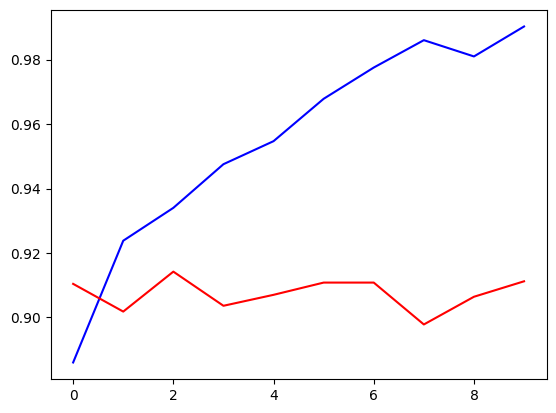

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='val_accuracy')
# Clearly we can see there is a kind of overfitting in the model. We can perform fine tuning instead of feature extraction or we can perform data augmentation.That's what we will try to do in next notebooks.

# Prediction

In [16]:
img_dog='/content/Dog.webp'
img_cat='/content/Cat.webp'


In [24]:
import numpy as np
img=keras.utils.load_img(path=img_dog,target_size=(150,150))
img=keras.utils.img_to_array(img)
img=np.expand_dims(img,axis=0)
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[1.]], dtype=float32)